In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle



In [7]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [22]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical

In [9]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.drop_duplicates(inplace=True)

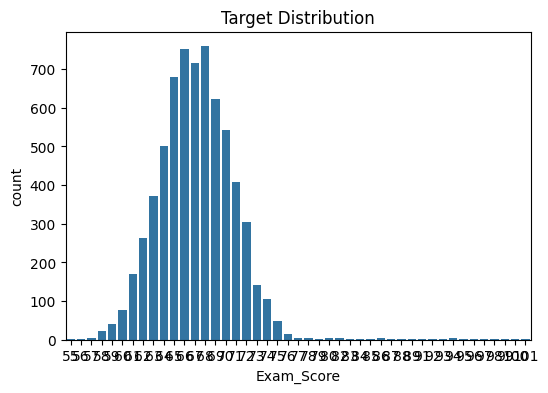

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Exam_Score", data=df)
plt.title("Target Distribution")
plt.show()

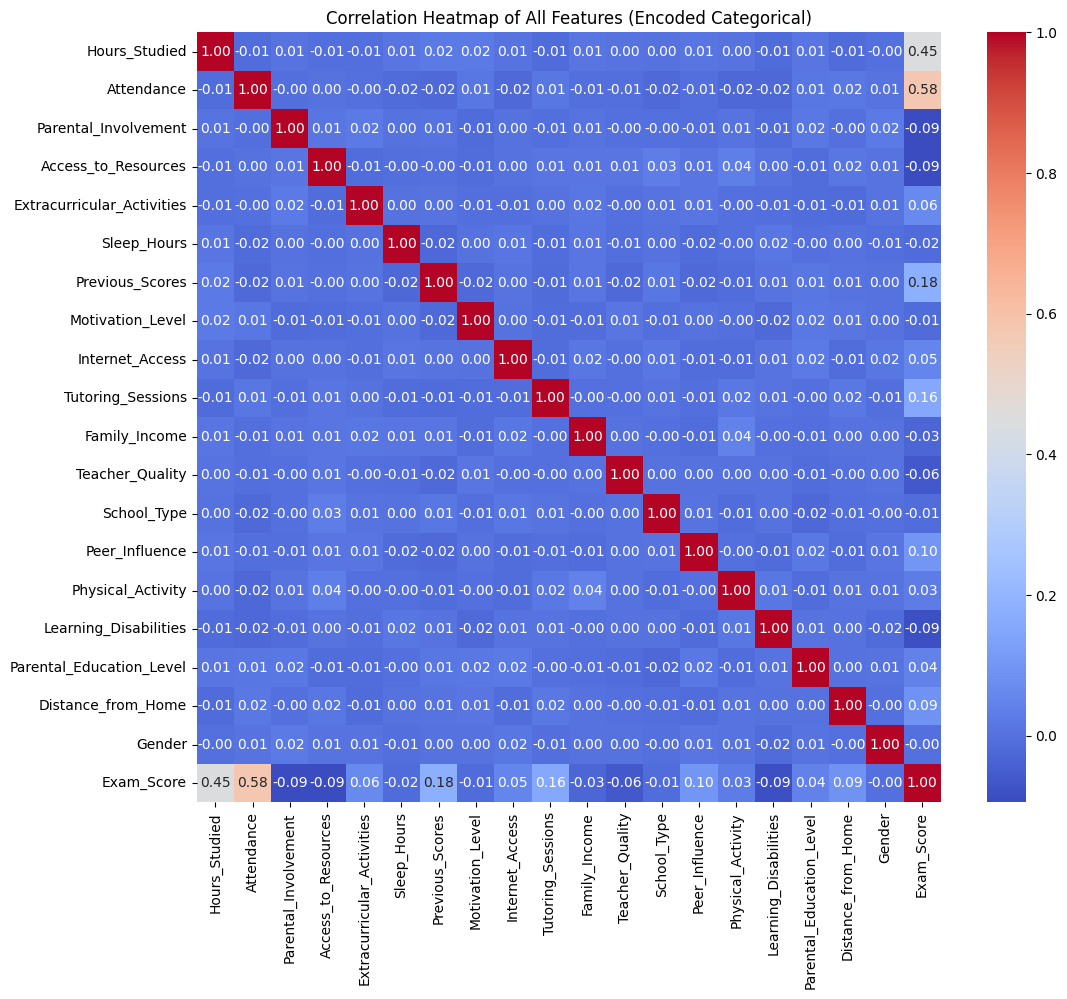

In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of All Features (Encoded Categorical)")
plt.show()

In [12]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])



In [13]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.3079
              precision    recall  f1-score   support

          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         2
          58       1.00      0.33      0.50         3
          59       0.00      0.00      0.00         5
          60       0.25      0.08      0.12        13
          61       0.28      0.31      0.29        26
          62       0.32      0.24      0.27        54
          63       0.36      0.27      0.31        77
          64       0.31      0.35      0.33        94
          65       0.38      0.39      0.39       148
          66       0.28      0.39      0.33       144
          67       0.27      0.20      0.23       142
          68       0.30      0.39      0.34       147
          69       0.31      0.36      0.33       118
          70       0.33      0.33      0.33       116
          71       0.25      0.24      0.25        84
          72       0.31      0.29      0.30 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Random Forest Accuracy: 0.2474
              precision    recall  f1-score   support

          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         3
          59       0.00      0.00      0.00         5
          60       0.50      0.08      0.13        13
          61       0.30      0.27      0.29        26
          62       0.21      0.13      0.16        54
          63       0.20      0.16      0.18        77
          64       0.20      0.23      0.22        94
          65       0.32      0.37      0.34       148
          66       0.21      0.24      0.22       144
          67       0.23      0.26      0.25       142
          68       0.24      0.30      0.27       147
          69       0.29      0.36      0.32       118
          70       0.21      0.22      0.21       116
          71       0.27      0.23      0.25        84
          72       0.21      0.17      0.19       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy: 0.2821
              precision    recall  f1-score   support

          55       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         3
          59       0.00      0.00      0.00         5
          60       0.43      0.23      0.30        13
          61       0.22      0.23      0.23        26
          62       0.26      0.19      0.22        54
          63       0.30      0.27      0.28        77
          64       0.19      0.19      0.19        94
          65       0.31      0.34      0.33       148
          66       0.33      0.37      0.35       144
          67       0.30      0.24      0.27       142
          68       0.26      0.33      0.29       147
          69       0.30      0.35      0.32       118
          70       0.27      0.22      0.25       116
          71       0.36      0.31      0.33        84
          72       0.31      0.31      0.31   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [18]:
with open("student_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as student_model.pkl")


Model saved as student_model.pkl


In [19]:
import streamlit as st
import pickle
import numpy as np

In [20]:
model = pickle.load(open("student_model.pkl", "rb"))

st.title("🎓 Student Performance Prediction")

2026-02-07 03:26:36.149 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 03:26:36.335 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-07 03:26:36.336 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 03:26:36.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [21]:
import pickle
import numpy as np
import pandas as pd

model = pickle.load(open("student_model.pkl", "rb"))


raw_test_input = np.array([
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0]
])

if 'scaler' in globals() and 'X' in globals() and isinstance(X, pd.DataFrame):
    raw_test_df = pd.DataFrame(raw_test_input, columns=X.columns)
    scaled_test_input = scaler.transform(raw_test_df)
else:
    print("Scaler or original X DataFrame not found. Cannot ensure proper scaling with feature names.")
    scaled_test_input = scaler.transform(raw_test_input)

prediction = model.predict(scaled_test_input)

threshold = 60

score = prediction[0]
print(f"Predicted Exam Score: {score}")
if score >= threshold:
    print(f"Prediction: Pass ✅ (Score: {score}) ")
else:
    print(f"Prediction: Fail ❌ (Score: {score}) ")

Predicted Exam Score: 59
Prediction: Fail ❌ (Score: 59) 
